# Utilisation and Gantt Chart

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import datetime
pd.set_option('display.max_columns', None)

## Data

In [2]:
data = [
    ['nico', 1, '2023-11-21 13:00:00', '2023-11-21 18:00:00', '2023-11-21 18:00:00', '2023-11-21 20:00:00', '2023-11-21 13:15:00', '2023-11-21 13:30:00'],
    ['nico', 2, '2023-11-21 13:00:00', '2023-11-21 18:00:00', '2023-11-21 18:00:00', '2023-11-21 20:00:00', '2023-11-21 13:15:00', '2023-11-21 14:45:00'],
    ['nico', 3, '2023-11-21 13:00:00', '2023-11-21 18:00:00', '2023-11-21 18:00:00', '2023-11-21 20:00:00', '2023-11-21 14:00:00', '2023-11-21 16:00:00'],
    ['nico', 4, '2023-11-21 13:00:00', '2023-11-21 18:00:00', '2023-11-21 18:00:00', '2023-11-21 20:00:00', '2023-11-21 17:30:00', '2023-11-21 18:30:00'],
    ['nico', 5, '2023-11-21 13:00:00', '2023-11-21 18:00:00', '2023-11-21 18:00:00', '2023-11-21 20:00:00', '2023-11-21 19:00:00', '2023-11-21 19:30:00'],
    ['pepe', 6, '2023-11-21 13:00:00', '2023-11-21 18:00:00', '2023-11-21 11:00:00', '2023-11-21 13:00:00', '2023-11-21 11:15:00', '2023-11-21 14:00:00'],
    ['pepe', 7, '2023-11-21 13:00:00', '2023-11-21 18:00:00', '2023-11-21 11:00:00', '2023-11-21 13:00:00', '2023-11-21 15:00:00', '2023-11-21 16:30:00'],
    ['pepe', 8, '2023-11-21 13:00:00', '2023-11-21 18:00:00', '2023-11-21 11:00:00', '2023-11-21 13:00:00', '2023-11-21 15:00:00', '2023-11-21 17:30:00'],
    ['pepe', 9, '2023-11-21 13:00:00', '2023-11-21 18:00:00', '2023-11-21 11:00:00', '2023-11-21 13:00:00', '2023-11-21 16:00:00', '2023-11-21 17:30:00'],
    ['kong', 10, '2023-11-21 13:00:00', '2023-11-21 18:00:00', '2023-11-21 11:00:00', '2023-11-21 13:00:00', '2023-11-21 13:30:00', '2023-11-21 17:30:00'],
    ['kong', 11, '2023-11-21 13:00:00', '2023-11-21 18:00:00', '2023-11-21 11:00:00', '2023-11-21 13:00:00', '2023-11-21 14:00:00', '2023-11-21 14:30:00'],
    ['kong', 12, '2023-11-21 13:00:00', '2023-11-21 18:00:00', '2023-11-21 11:00:00', '2023-11-21 13:00:00', '2023-11-21 15:00:00', '2023-11-21 15:30:00'],
    ['kong', 13, '2023-11-21 13:00:00', '2023-11-21 18:00:00', '2023-11-21 11:00:00', '2023-11-21 13:00:00', '2023-11-21 16:00:00', '2023-11-21 16:30:00']]


cols = ['name', 'task', 'RosterStart', 'RosterEnd', 'OvertimeStart', 'OvertimeEnd', 'TaskStart', 'TaskEnd']

df = pd.DataFrame(data=data, columns=cols)

df['RosterStart'] = pd.to_datetime(df['RosterStart'])
df['RosterEnd'] = pd.to_datetime(df['RosterEnd'])
df['OvertimeStart'] = pd.to_datetime(df['OvertimeStart'])
df['OvertimeEnd'] = pd.to_datetime(df['OvertimeEnd'])
df['TaskStart'] = pd.to_datetime(df['TaskStart'])
df['TaskEnd'] = pd.to_datetime(df['TaskEnd'])

In [3]:
df

,name,task,RosterStart,RosterEnd,OvertimeStart,OvertimeEnd,TaskStart,TaskEnd
0,nico,1,2023-11-21 13:00:00,2023-11-21 18:00:00,2023-11-21 18:00:00,2023-11-21 20:00:00,2023-11-21 13:15:00,2023-11-21 13:30:00
1,nico,2,2023-11-21 13:00:00,2023-11-21 18:00:00,2023-11-21 18:00:00,2023-11-21 20:00:00,2023-11-21 13:15:00,2023-11-21 14:45:00
2,nico,3,2023-11-21 13:00:00,2023-11-21 18:00:00,2023-11-21 18:00:00,2023-11-21 20:00:00,2023-11-21 14:00:00,2023-11-21 16:00:00
3,nico,4,2023-11-21 13:00:00,2023-11-21 18:00:00,2023-11-21 18:00:00,2023-11-21 20:00:00,2023-11-21 17:30:00,2023-11-21 18:30:00
4,nico,5,2023-11-21 13:00:00,2023-11-21 18:00:00,2023-11-21 18:00:00,2023-11-21 20:00:00,2023-11-21 19:00:00,2023-11-21 19:30:00
5,pepe,6,2023-11-21 13:00:00,2023-11-21 18:00:00,2023-11-21 11:00:00,2023-11-21 13:00:00,2023-11-21 11:15:00,2023-11-21 14:00:00
6,pepe,7,2023-11-21 13:00:00,2023-11-21 18:00:00,2023-11-21 11:00:00,2023-11-21 13:00:00,2023-11-21 15:00:00,2023-11-21 16:30:00
7,pepe,8,2023-11-21 13:00:00,2023-11-21 18:00:00,2023-11-21 11:00:00,2023-11-21 13:00:00,2023-11-21 15:00:00,2023-11-21 17:30:00
8,pepe,9,2023-11-21 13:00:00,2023-11-21 18:00:00,2023-11-21 11:00:00,2023-11-21 13:00:00,2023-11-21 16:00:00,2023-11-21 17:30:00
9,kong,10,2023-11-21 13:00:00,2023-11-21 18:00:00,2023-11-21 11:00:00,2023-11-21 13:00:00,2023-11-21 13:30:00,2023-11-21 17:30:00


## Gantt Chart

In [6]:
person = 'nico'
gantt_cols = ['task', 'TaskStart', 'TaskEnd', 'RosterStart', 'RosterEnd', 'OvertimeStart', 'OvertimeEnd']
gg = df.query('name == @person')[gantt_cols].sort_values(['TaskStart', 'TaskEnd'], ascending=[True, True])

In [8]:
duty_start = min(gg.RosterStart.max(), gg.OvertimeStart.max())
duty_end = max(gg.RosterStart.max(), gg.OvertimeStart.max())

gg['is_overtime_first'] = True
gg.loc[gg.RosterStart < gg.OvertimeStart, 'is_overtime_first'] = False
gg['roster_duration'] = (df.RosterEnd - df.RosterStart) / np.timedelta64(1, 'm')
gg['overtime_duration'] = (df.OvertimeEnd - df.OvertimeStart) / np.timedelta64(1, 'm')
gg['duty_duration'] = gg['roster_duration'] + gg['overtime_duration']

gg['elapsed'] = (df.TaskEnd - df.TaskStart) / np.timedelta64(1, 'm')
gg['relative_start'] = (gg.TaskStart - duty_start) / np.timedelta64(1, 'm')
gg['relative_end'] = (gg.TaskEnd - duty_start) / np.timedelta64(1, 'm')

overtime_line = gg.overtime_duration.iloc[0] if gg.is_overtime_first.iloc[0] == True else gg.roster_duration.iloc[0]

gg

,task,TaskStart,TaskEnd,RosterStart,RosterEnd,OvertimeStart,OvertimeEnd,is_overtime_first,roster_duration,overtime_duration,duty_duration,elapsed,relative_start,relative_end
0,1,2023-11-21 13:15:00,2023-11-21 13:30:00,2023-11-21 13:00:00,2023-11-21 18:00:00,2023-11-21 18:00:00,2023-11-21 20:00:00,False,300.0,120.0,420.0,15.0,15.0,30.0
1,2,2023-11-21 13:15:00,2023-11-21 14:45:00,2023-11-21 13:00:00,2023-11-21 18:00:00,2023-11-21 18:00:00,2023-11-21 20:00:00,False,300.0,120.0,420.0,90.0,15.0,105.0
2,3,2023-11-21 14:00:00,2023-11-21 16:00:00,2023-11-21 13:00:00,2023-11-21 18:00:00,2023-11-21 18:00:00,2023-11-21 20:00:00,False,300.0,120.0,420.0,120.0,60.0,180.0
3,4,2023-11-21 17:30:00,2023-11-21 18:30:00,2023-11-21 13:00:00,2023-11-21 18:00:00,2023-11-21 18:00:00,2023-11-21 20:00:00,False,300.0,120.0,420.0,60.0,270.0,330.0
4,5,2023-11-21 19:00:00,2023-11-21 19:30:00,2023-11-21 13:00:00,2023-11-21 18:00:00,2023-11-21 18:00:00,2023-11-21 20:00:00,False,300.0,120.0,420.0,30.0,360.0,390.0


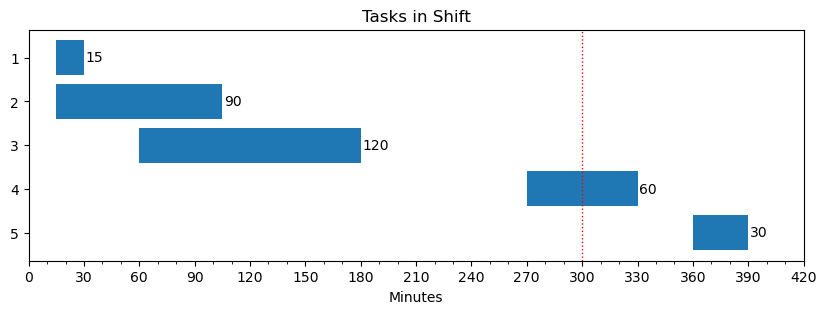

In [9]:
fig, ax = plt.subplots(1, figsize=(10,3))
ax.barh(gg.task, gg.elapsed, left=gg.relative_start)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Minutes')
ax.set_title('Tasks in Shift')

# X ticks 
xticks = np.arange(0, gg.duty_duration.max()+1, 30)
xticks_labels = pd.date_range(duty_start, end=(duty_end + datetime.timedelta(minutes=1))).strftime("%m/%d %M:%S")
xticks_minor = np.arange(0, gg.duty_duration.max()+1, 10)
ax.set_xticks(xticks)
ax.set_xticks(xticks_minor, minor=True)
#ax.set_xticklabels(xticks_labels[::3])

ax.axvline(overtime_line, color='r', ls=':', lw=1)

# Text - Elapsed
for row in gg.itertuples():
    ax.text(row.relative_end + 1, row.task, f"{int(row.elapsed)}", va='center')

plt.show()

## Utilisation

In [10]:
# Sorting by TaskStart and TaskEnd
df = df.sort_values(['name', 'TaskStart', 'TaskEnd'], ascending=[True, True, True])

df.head()

,name,task,RosterStart,RosterEnd,OvertimeStart,OvertimeEnd,TaskStart,TaskEnd
9,kong,10,2023-11-21 13:00:00,2023-11-21 18:00:00,2023-11-21 11:00:00,2023-11-21 13:00:00,2023-11-21 13:30:00,2023-11-21 17:30:00
10,kong,11,2023-11-21 13:00:00,2023-11-21 18:00:00,2023-11-21 11:00:00,2023-11-21 13:00:00,2023-11-21 14:00:00,2023-11-21 14:30:00
11,kong,12,2023-11-21 13:00:00,2023-11-21 18:00:00,2023-11-21 11:00:00,2023-11-21 13:00:00,2023-11-21 15:00:00,2023-11-21 15:30:00
12,kong,13,2023-11-21 13:00:00,2023-11-21 18:00:00,2023-11-21 11:00:00,2023-11-21 13:00:00,2023-11-21 16:00:00,2023-11-21 16:30:00
0,nico,1,2023-11-21 13:00:00,2023-11-21 18:00:00,2023-11-21 18:00:00,2023-11-21 20:00:00,2023-11-21 13:15:00,2023-11-21 13:30:00


In [11]:
# Compute Task start and end taking into account Roster and Overtime Start and End
df['RosterTaskStart'] = np.where(df.TaskStart > df.RosterStart, df.TaskStart, df.RosterStart)
df['RosterTaskEnd'] = np.where(df.TaskEnd <= df.RosterEnd, df.TaskEnd, df.RosterEnd)
df['OvertimeTaskStart'] = np.where((df.TaskStart > df.OvertimeStart) & (df.TaskStart <= df.OvertimeEnd), df.TaskStart, df.OvertimeStart)
df['OvertimeTaskEnd'] = np.where((df.TaskEnd <= df.OvertimeEnd) & (df.TaskEnd > df.OvertimeStart), df.TaskEnd, df.OvertimeEnd)

df.head()

,name,task,RosterStart,RosterEnd,OvertimeStart,OvertimeEnd,TaskStart,TaskEnd,RosterTaskStart,RosterTaskEnd,OvertimeTaskStart,OvertimeTaskEnd
9,kong,10,2023-11-21 13:00:00,2023-11-21 18:00:00,2023-11-21 11:00:00,2023-11-21 13:00:00,2023-11-21 13:30:00,2023-11-21 17:30:00,2023-11-21 13:30:00,2023-11-21 17:30:00,2023-11-21 11:00:00,2023-11-21 13:00:00
10,kong,11,2023-11-21 13:00:00,2023-11-21 18:00:00,2023-11-21 11:00:00,2023-11-21 13:00:00,2023-11-21 14:00:00,2023-11-21 14:30:00,2023-11-21 14:00:00,2023-11-21 14:30:00,2023-11-21 11:00:00,2023-11-21 13:00:00
11,kong,12,2023-11-21 13:00:00,2023-11-21 18:00:00,2023-11-21 11:00:00,2023-11-21 13:00:00,2023-11-21 15:00:00,2023-11-21 15:30:00,2023-11-21 15:00:00,2023-11-21 15:30:00,2023-11-21 11:00:00,2023-11-21 13:00:00
12,kong,13,2023-11-21 13:00:00,2023-11-21 18:00:00,2023-11-21 11:00:00,2023-11-21 13:00:00,2023-11-21 16:00:00,2023-11-21 16:30:00,2023-11-21 16:00:00,2023-11-21 16:30:00,2023-11-21 11:00:00,2023-11-21 13:00:00
0,nico,1,2023-11-21 13:00:00,2023-11-21 18:00:00,2023-11-21 18:00:00,2023-11-21 20:00:00,2023-11-21 13:15:00,2023-11-21 13:30:00,2023-11-21 13:15:00,2023-11-21 13:30:00,2023-11-21 18:00:00,2023-11-21 20:00:00


In [12]:
# Shifting next Task starting time into a new column to compare
df['nextTaskStartRoster'] = df.sort_values(['TaskStart', 'TaskEnd']).groupby('name')['RosterTaskStart'].shift(-1)
df['nextTaskStartOvertime'] = df.sort_values(['TaskStart', 'TaskEnd']).groupby('name')['OvertimeTaskStart'].shift(-1)
#df['nextTaskEndRoster'] = df.sort_values(['TaskStart', 'TaskEnd']).groupby('name')['RosterTaskEnd'].shift(1)
#df['nextTaskEndOvertime'] = df.sort_values(['TaskStart', 'TaskEnd']).groupby('name')['OvertimeTaskEnd'].shift(1) 

df.head()

,name,task,RosterStart,RosterEnd,OvertimeStart,OvertimeEnd,TaskStart,TaskEnd,RosterTaskStart,RosterTaskEnd,OvertimeTaskStart,OvertimeTaskEnd,nextTaskStartRoster,nextTaskStartOvertime
9,kong,10,2023-11-21 13:00:00,2023-11-21 18:00:00,2023-11-21 11:00:00,2023-11-21 13:00:00,2023-11-21 13:30:00,2023-11-21 17:30:00,2023-11-21 13:30:00,2023-11-21 17:30:00,2023-11-21 11:00:00,2023-11-21 13:00:00,2023-11-21 14:00:00,2023-11-21 11:00:00
10,kong,11,2023-11-21 13:00:00,2023-11-21 18:00:00,2023-11-21 11:00:00,2023-11-21 13:00:00,2023-11-21 14:00:00,2023-11-21 14:30:00,2023-11-21 14:00:00,2023-11-21 14:30:00,2023-11-21 11:00:00,2023-11-21 13:00:00,2023-11-21 15:00:00,2023-11-21 11:00:00
11,kong,12,2023-11-21 13:00:00,2023-11-21 18:00:00,2023-11-21 11:00:00,2023-11-21 13:00:00,2023-11-21 15:00:00,2023-11-21 15:30:00,2023-11-21 15:00:00,2023-11-21 15:30:00,2023-11-21 11:00:00,2023-11-21 13:00:00,2023-11-21 16:00:00,2023-11-21 11:00:00
12,kong,13,2023-11-21 13:00:00,2023-11-21 18:00:00,2023-11-21 11:00:00,2023-11-21 13:00:00,2023-11-21 16:00:00,2023-11-21 16:30:00,2023-11-21 16:00:00,2023-11-21 16:30:00,2023-11-21 11:00:00,2023-11-21 13:00:00,NaT,NaT
0,nico,1,2023-11-21 13:00:00,2023-11-21 18:00:00,2023-11-21 18:00:00,2023-11-21 20:00:00,2023-11-21 13:15:00,2023-11-21 13:30:00,2023-11-21 13:15:00,2023-11-21 13:30:00,2023-11-21 18:00:00,2023-11-21 20:00:00,2023-11-21 13:15:00,2023-11-21 18:00:00


In [13]:
# Overlapping times
df['overlapRoster'] = round((df.RosterTaskEnd - df.nextTaskStartRoster).dt.total_seconds() / 60 ,2)
df['overlapOvertime'] = round((df.OvertimeTaskEnd - df.nextTaskStartOvertime).dt.total_seconds() / 60 ,2)
df.loc[df['overlapRoster'] < 0, 'overlapRoster'] = 0
df.loc[df['overlapOvertime'] < 0, 'overlapOvertime'] = 0
df['overlapRoster'] = df['overlapRoster'].fillna(0)
df['overlapOvertime'] = df['overlapOvertime'].fillna(0)

df.head()

,name,task,RosterStart,RosterEnd,OvertimeStart,OvertimeEnd,TaskStart,TaskEnd,RosterTaskStart,RosterTaskEnd,OvertimeTaskStart,OvertimeTaskEnd,nextTaskStartRoster,nextTaskStartOvertime,overlapRoster,overlapOvertime
9,kong,10,2023-11-21 13:00:00,2023-11-21 18:00:00,2023-11-21 11:00:00,2023-11-21 13:00:00,2023-11-21 13:30:00,2023-11-21 17:30:00,2023-11-21 13:30:00,2023-11-21 17:30:00,2023-11-21 11:00:00,2023-11-21 13:00:00,2023-11-21 14:00:00,2023-11-21 11:00:00,210.0,120.0
10,kong,11,2023-11-21 13:00:00,2023-11-21 18:00:00,2023-11-21 11:00:00,2023-11-21 13:00:00,2023-11-21 14:00:00,2023-11-21 14:30:00,2023-11-21 14:00:00,2023-11-21 14:30:00,2023-11-21 11:00:00,2023-11-21 13:00:00,2023-11-21 15:00:00,2023-11-21 11:00:00,0.0,120.0
11,kong,12,2023-11-21 13:00:00,2023-11-21 18:00:00,2023-11-21 11:00:00,2023-11-21 13:00:00,2023-11-21 15:00:00,2023-11-21 15:30:00,2023-11-21 15:00:00,2023-11-21 15:30:00,2023-11-21 11:00:00,2023-11-21 13:00:00,2023-11-21 16:00:00,2023-11-21 11:00:00,0.0,120.0
12,kong,13,2023-11-21 13:00:00,2023-11-21 18:00:00,2023-11-21 11:00:00,2023-11-21 13:00:00,2023-11-21 16:00:00,2023-11-21 16:30:00,2023-11-21 16:00:00,2023-11-21 16:30:00,2023-11-21 11:00:00,2023-11-21 13:00:00,NaT,NaT,0.0,0.0
0,nico,1,2023-11-21 13:00:00,2023-11-21 18:00:00,2023-11-21 18:00:00,2023-11-21 20:00:00,2023-11-21 13:15:00,2023-11-21 13:30:00,2023-11-21 13:15:00,2023-11-21 13:30:00,2023-11-21 18:00:00,2023-11-21 20:00:00,2023-11-21 13:15:00,2023-11-21 18:00:00,15.0,120.0


In [14]:
# Task Roster and Overlap elapsed time
df['TaskElapsed'] = round((df.TaskEnd - df.TaskStart).dt.total_seconds() / 60, 2)

df['RosterElapsed'] = round((df.RosterTaskEnd - df.RosterTaskStart).dt.total_seconds() / 60, 2)
df['OvertimeElapsed'] = round((df.OvertimeTaskEnd - df.OvertimeTaskStart).dt.total_seconds() / 60, 2)

df.loc[df['RosterElapsed'] < 0, 'RosterElapsed'] = 0
df.loc[df['OvertimeElapsed'] < 0, 'OvertimeElapsed'] = 0

df.head()

,name,task,RosterStart,RosterEnd,OvertimeStart,OvertimeEnd,TaskStart,TaskEnd,RosterTaskStart,RosterTaskEnd,OvertimeTaskStart,OvertimeTaskEnd,nextTaskStartRoster,nextTaskStartOvertime,overlapRoster,overlapOvertime,TaskElapsed,RosterElapsed,OvertimeElapsed
9,kong,10,2023-11-21 13:00:00,2023-11-21 18:00:00,2023-11-21 11:00:00,2023-11-21 13:00:00,2023-11-21 13:30:00,2023-11-21 17:30:00,2023-11-21 13:30:00,2023-11-21 17:30:00,2023-11-21 11:00:00,2023-11-21 13:00:00,2023-11-21 14:00:00,2023-11-21 11:00:00,210.0,120.0,240.0,240.0,120.0
10,kong,11,2023-11-21 13:00:00,2023-11-21 18:00:00,2023-11-21 11:00:00,2023-11-21 13:00:00,2023-11-21 14:00:00,2023-11-21 14:30:00,2023-11-21 14:00:00,2023-11-21 14:30:00,2023-11-21 11:00:00,2023-11-21 13:00:00,2023-11-21 15:00:00,2023-11-21 11:00:00,0.0,120.0,30.0,30.0,120.0
11,kong,12,2023-11-21 13:00:00,2023-11-21 18:00:00,2023-11-21 11:00:00,2023-11-21 13:00:00,2023-11-21 15:00:00,2023-11-21 15:30:00,2023-11-21 15:00:00,2023-11-21 15:30:00,2023-11-21 11:00:00,2023-11-21 13:00:00,2023-11-21 16:00:00,2023-11-21 11:00:00,0.0,120.0,30.0,30.0,120.0
12,kong,13,2023-11-21 13:00:00,2023-11-21 18:00:00,2023-11-21 11:00:00,2023-11-21 13:00:00,2023-11-21 16:00:00,2023-11-21 16:30:00,2023-11-21 16:00:00,2023-11-21 16:30:00,2023-11-21 11:00:00,2023-11-21 13:00:00,NaT,NaT,0.0,0.0,30.0,30.0,120.0
0,nico,1,2023-11-21 13:00:00,2023-11-21 18:00:00,2023-11-21 18:00:00,2023-11-21 20:00:00,2023-11-21 13:15:00,2023-11-21 13:30:00,2023-11-21 13:15:00,2023-11-21 13:30:00,2023-11-21 18:00:00,2023-11-21 20:00:00,2023-11-21 13:15:00,2023-11-21 18:00:00,15.0,120.0,15.0,15.0,120.0


In [15]:
# Computing total overlap and total time in roster and overtime
overlap_cols = ['overlapRoster_tot', 'RosterElapsed_tot', 'overlapOvertime_tot', 'OvertimeElapsed_tot']
df[overlap_cols] = df[['name', 'TaskStart', 'overlapRoster', 'RosterElapsed', 'overlapOvertime', 'OvertimeElapsed']] \
                    .sort_values('TaskStart').groupby('name')[['overlapRoster', 'RosterElapsed', 'overlapOvertime', 'OvertimeElapsed']] \
                    .transform(np.sum)

df['RosterActive'] = round(df.RosterElapsed_tot - df.overlapRoster_tot, 2)
df['OvertimeActive'] = round(df.OvertimeElapsed_tot - df.overlapOvertime_tot, 2)
df['DutyActive'] = df['RosterActive'] + df['OvertimeActive']

df.head()

,name,task,RosterStart,RosterEnd,OvertimeStart,OvertimeEnd,TaskStart,TaskEnd,RosterTaskStart,RosterTaskEnd,OvertimeTaskStart,OvertimeTaskEnd,nextTaskStartRoster,nextTaskStartOvertime,overlapRoster,overlapOvertime,TaskElapsed,RosterElapsed,OvertimeElapsed,overlapRoster_tot,RosterElapsed_tot,overlapOvertime_tot,OvertimeElapsed_tot,RosterActive,OvertimeActive,DutyActive
9,kong,10,2023-11-21 13:00:00,2023-11-21 18:00:00,2023-11-21 11:00:00,2023-11-21 13:00:00,2023-11-21 13:30:00,2023-11-21 17:30:00,2023-11-21 13:30:00,2023-11-21 17:30:00,2023-11-21 11:00:00,2023-11-21 13:00:00,2023-11-21 14:00:00,2023-11-21 11:00:00,210.0,120.0,240.0,240.0,120.0,210.0,330.0,360.0,480.0,120.0,120.0,240.0
10,kong,11,2023-11-21 13:00:00,2023-11-21 18:00:00,2023-11-21 11:00:00,2023-11-21 13:00:00,2023-11-21 14:00:00,2023-11-21 14:30:00,2023-11-21 14:00:00,2023-11-21 14:30:00,2023-11-21 11:00:00,2023-11-21 13:00:00,2023-11-21 15:00:00,2023-11-21 11:00:00,0.0,120.0,30.0,30.0,120.0,210.0,330.0,360.0,480.0,120.0,120.0,240.0
11,kong,12,2023-11-21 13:00:00,2023-11-21 18:00:00,2023-11-21 11:00:00,2023-11-21 13:00:00,2023-11-21 15:00:00,2023-11-21 15:30:00,2023-11-21 15:00:00,2023-11-21 15:30:00,2023-11-21 11:00:00,2023-11-21 13:00:00,2023-11-21 16:00:00,2023-11-21 11:00:00,0.0,120.0,30.0,30.0,120.0,210.0,330.0,360.0,480.0,120.0,120.0,240.0
12,kong,13,2023-11-21 13:00:00,2023-11-21 18:00:00,2023-11-21 11:00:00,2023-11-21 13:00:00,2023-11-21 16:00:00,2023-11-21 16:30:00,2023-11-21 16:00:00,2023-11-21 16:30:00,2023-11-21 11:00:00,2023-11-21 13:00:00,NaT,NaT,0.0,0.0,30.0,30.0,120.0,210.0,330.0,360.0,480.0,120.0,120.0,240.0
0,nico,1,2023-11-21 13:00:00,2023-11-21 18:00:00,2023-11-21 18:00:00,2023-11-21 20:00:00,2023-11-21 13:15:00,2023-11-21 13:30:00,2023-11-21 13:15:00,2023-11-21 13:30:00,2023-11-21 18:00:00,2023-11-21 20:00:00,2023-11-21 13:15:00,2023-11-21 18:00:00,15.0,120.0,15.0,15.0,120.0,60.0,255.0,360.0,420.0,195.0,60.0,255.0


In [16]:
# Computing Roster, Overtime and Duty time in shift
df['RosterShift'] = round((df.RosterEnd - df.RosterStart).dt.total_seconds() / 60, 2)
df['OvertimeShift'] = round((df.OvertimeEnd - df.OvertimeStart).dt.total_seconds() / 60, 2)
df['DutyShift'] = df['RosterShift'] + df['OvertimeShift']

df.head()

,name,task,RosterStart,RosterEnd,OvertimeStart,OvertimeEnd,TaskStart,TaskEnd,RosterTaskStart,RosterTaskEnd,OvertimeTaskStart,OvertimeTaskEnd,nextTaskStartRoster,nextTaskStartOvertime,overlapRoster,overlapOvertime,TaskElapsed,RosterElapsed,OvertimeElapsed,overlapRoster_tot,RosterElapsed_tot,overlapOvertime_tot,OvertimeElapsed_tot,RosterActive,OvertimeActive,DutyActive,RosterShift,OvertimeShift,DutyShift
9,kong,10,2023-11-21 13:00:00,2023-11-21 18:00:00,2023-11-21 11:00:00,2023-11-21 13:00:00,2023-11-21 13:30:00,2023-11-21 17:30:00,2023-11-21 13:30:00,2023-11-21 17:30:00,2023-11-21 11:00:00,2023-11-21 13:00:00,2023-11-21 14:00:00,2023-11-21 11:00:00,210.0,120.0,240.0,240.0,120.0,210.0,330.0,360.0,480.0,120.0,120.0,240.0,300.0,120.0,420.0
10,kong,11,2023-11-21 13:00:00,2023-11-21 18:00:00,2023-11-21 11:00:00,2023-11-21 13:00:00,2023-11-21 14:00:00,2023-11-21 14:30:00,2023-11-21 14:00:00,2023-11-21 14:30:00,2023-11-21 11:00:00,2023-11-21 13:00:00,2023-11-21 15:00:00,2023-11-21 11:00:00,0.0,120.0,30.0,30.0,120.0,210.0,330.0,360.0,480.0,120.0,120.0,240.0,300.0,120.0,420.0
11,kong,12,2023-11-21 13:00:00,2023-11-21 18:00:00,2023-11-21 11:00:00,2023-11-21 13:00:00,2023-11-21 15:00:00,2023-11-21 15:30:00,2023-11-21 15:00:00,2023-11-21 15:30:00,2023-11-21 11:00:00,2023-11-21 13:00:00,2023-11-21 16:00:00,2023-11-21 11:00:00,0.0,120.0,30.0,30.0,120.0,210.0,330.0,360.0,480.0,120.0,120.0,240.0,300.0,120.0,420.0
12,kong,13,2023-11-21 13:00:00,2023-11-21 18:00:00,2023-11-21 11:00:00,2023-11-21 13:00:00,2023-11-21 16:00:00,2023-11-21 16:30:00,2023-11-21 16:00:00,2023-11-21 16:30:00,2023-11-21 11:00:00,2023-11-21 13:00:00,NaT,NaT,0.0,0.0,30.0,30.0,120.0,210.0,330.0,360.0,480.0,120.0,120.0,240.0,300.0,120.0,420.0
0,nico,1,2023-11-21 13:00:00,2023-11-21 18:00:00,2023-11-21 18:00:00,2023-11-21 20:00:00,2023-11-21 13:15:00,2023-11-21 13:30:00,2023-11-21 13:15:00,2023-11-21 13:30:00,2023-11-21 18:00:00,2023-11-21 20:00:00,2023-11-21 13:15:00,2023-11-21 18:00:00,15.0,120.0,15.0,15.0,120.0,60.0,255.0,360.0,420.0,195.0,60.0,255.0,300.0,120.0,420.0


In [17]:
# Utilisation
df['RosterUtilisation'] = round(df['RosterActive'] / df['RosterShift'], 2)
df['OvertimeUtilisation'] = round(df['OvertimeActive'] / df['OvertimeShift'], 2 )
df['DutyUtilisation'] = round(df['DutyActive'] / df['DutyShift'], 2)

In [18]:
df

,name,task,RosterStart,RosterEnd,OvertimeStart,OvertimeEnd,TaskStart,TaskEnd,RosterTaskStart,RosterTaskEnd,OvertimeTaskStart,OvertimeTaskEnd,nextTaskStartRoster,nextTaskStartOvertime,overlapRoster,overlapOvertime,TaskElapsed,RosterElapsed,OvertimeElapsed,overlapRoster_tot,RosterElapsed_tot,overlapOvertime_tot,OvertimeElapsed_tot,RosterActive,OvertimeActive,DutyActive,RosterShift,OvertimeShift,DutyShift,RosterUtilisation,OvertimeUtilisation,DutyUtilisation
9,kong,10,2023-11-21 13:00:00,2023-11-21 18:00:00,2023-11-21 11:00:00,2023-11-21 13:00:00,2023-11-21 13:30:00,2023-11-21 17:30:00,2023-11-21 13:30:00,2023-11-21 17:30:00,2023-11-21 11:00:00,2023-11-21 13:00:00,2023-11-21 14:00:00,2023-11-21 11:00:00,210.0,120.0,240.0,240.0,120.0,210.0,330.0,360.0,480.0,120.0,120.0,240.0,300.0,120.0,420.0,0.40,1.00,0.57
10,kong,11,2023-11-21 13:00:00,2023-11-21 18:00:00,2023-11-21 11:00:00,2023-11-21 13:00:00,2023-11-21 14:00:00,2023-11-21 14:30:00,2023-11-21 14:00:00,2023-11-21 14:30:00,2023-11-21 11:00:00,2023-11-21 13:00:00,2023-11-21 15:00:00,2023-11-21 11:00:00,0.0,120.0,30.0,30.0,120.0,210.0,330.0,360.0,480.0,120.0,120.0,240.0,300.0,120.0,420.0,0.40,1.00,0.57
11,kong,12,2023-11-21 13:00:00,2023-11-21 18:00:00,2023-11-21 11:00:00,2023-11-21 13:00:00,2023-11-21 15:00:00,2023-11-21 15:30:00,2023-11-21 15:00:00,2023-11-21 15:30:00,2023-11-21 11:00:00,2023-11-21 13:00:00,2023-11-21 16:00:00,2023-11-21 11:00:00,0.0,120.0,30.0,30.0,120.0,210.0,330.0,360.0,480.0,120.0,120.0,240.0,300.0,120.0,420.0,0.40,1.00,0.57
12,kong,13,2023-11-21 13:00:00,2023-11-21 18:00:00,2023-11-21 11:00:00,2023-11-21 13:00:00,2023-11-21 16:00:00,2023-11-21 16:30:00,2023-11-21 16:00:00,2023-11-21 16:30:00,2023-11-21 11:00:00,2023-11-21 13:00:00,NaT,NaT,0.0,0.0,30.0,30.0,120.0,210.0,330.0,360.0,480.0,120.0,120.0,240.0,300.0,120.0,420.0,0.40,1.00,0.57
0,nico,1,2023-11-21 13:00:00,2023-11-21 18:00:00,2023-11-21 18:00:00,2023-11-21 20:00:00,2023-11-21 13:15:00,2023-11-21 13:30:00,2023-11-21 13:15:00,2023-11-21 13:30:00,2023-11-21 18:00:00,2023-11-21 20:00:00,2023-11-21 13:15:00,2023-11-21 18:00:00,15.0,120.0,15.0,15.0,120.0,60.0,255.0,360.0,420.0,195.0,60.0,255.0,300.0,120.0,420.0,0.65,0.50,0.61
1,nico,2,2023-11-21 13:00:00,2023-11-21 18:00:00,2023-11-21 18:00:00,2023-11-21 20:00:00,2023-11-21 13:15:00,2023-11-21 14:45:00,2023-11-21 13:15:00,2023-11-21 14:45:00,2023-11-21 18:00:00,2023-11-21 20:00:00,2023-11-21 14:00:00,2023-11-21 18:00:00,45.0,120.0,90.0,90.0,120.0,60.0,255.0,360.0,420.0,195.0,60.0,255.0,300.0,120.0,420.0,0.65,0.50,0.61
2,nico,3,2023-11-21 13:00:00,2023-11-21 18:00:00,2023-11-21 18:00:00,2023-11-21 20:00:00,2023-11-21 14:00:00,2023-11-21 16:00:00,2023-11-21 14:00:00,2023-11-21 16:00:00,2023-11-21 18:00:00,2023-11-21 20:00:00,2023-11-21 17:30:00,2023-11-21 18:00:00,0.0,120.0,120.0,120.0,120.0,60.0,255.0,360.0,420.0,195.0,60.0,255.0,300.0,120.0,420.0,0.65,0.50,0.61
3,nico,4,2023-11-21 13:00:00,2023-11-21 18:00:00,2023-11-21 18:00:00,2023-11-21 20:00:00,2023-11-21 17:30:00,2023-11-21 18:30:00,2023-11-21 17:30:00,2023-11-21 18:00:00,2023-11-21 18:00:00,2023-11-21 18:30:00,2023-11-21 19:00:00,2023-11-21 19:00:00,0.0,0.0,60.0,30.0,30.0,60.0,255.0,360.0,420.0,195.0,60.0,255.0,300.0,120.0,420.0,0.65,0.50,0.61
4,nico,5,2023-11-21 13:00:00,2023-11-21 18:00:00,2023-11-21 18:00:00,2023-11-21 20:00:00,2023-11-21 19:00:00,2023-11-21 19:30:00,2023-11-21 19:00:00,2023-11-21 18:00:00,2023-11-21 19:00:00,2023-11-21 19:30:00,NaT,NaT,0.0,0.0,30.0,0.0,30.0,60.0,255.0,360.0,420.0,195.0,60.0,255.0,300.0,120.0,420.0,0.65,0.50,0.61
5,pepe,6,2023-11-21 13:00:00,2023-11-21 18:00:00,2023-11-21 11:00:00,2023-11-21 13:00:00,2023-11-21 11:15:00,2023-11-21 14:00:00,2023-11-21 13:00:00,2023-11-21 14:00:00,2023-11-21 11:15:00,2023-11-21 13:00:00,2023-11-21 15:00:00,2023-11-21 11:00:00,0.0,120.0,165.0,60.0,105.0,180.0,390.0,360.0,465.0,210.0,105.0,315.0,300.0,120.0,420.0,0.70,0.88,0.75


In [19]:
# Shift Dataframe

sh = df[['name', 'RosterStart', 'RosterEnd', 'OvertimeStart',
       'OvertimeEnd', 'RosterActive', 'OvertimeActive', 'DutyActive',
       'RosterShift', 'OvertimeShift', 'DutyShift', 'RosterUtilisation',
       'OvertimeUtilisation', 'DutyUtilisation']].drop_duplicates()

sh

,name,RosterStart,RosterEnd,OvertimeStart,OvertimeEnd,RosterActive,OvertimeActive,DutyActive,RosterShift,OvertimeShift,DutyShift,RosterUtilisation,OvertimeUtilisation,DutyUtilisation
9,kong,2023-11-21 13:00:00,2023-11-21 18:00:00,2023-11-21 11:00:00,2023-11-21 13:00:00,120.0,120.0,240.0,300.0,120.0,420.0,0.40,1.00,0.57
0,nico,2023-11-21 13:00:00,2023-11-21 18:00:00,2023-11-21 18:00:00,2023-11-21 20:00:00,195.0,60.0,255.0,300.0,120.0,420.0,0.65,0.50,0.61
5,pepe,2023-11-21 13:00:00,2023-11-21 18:00:00,2023-11-21 11:00:00,2023-11-21 13:00:00,210.0,105.0,315.0,300.0,120.0,420.0,0.70,0.88,0.75


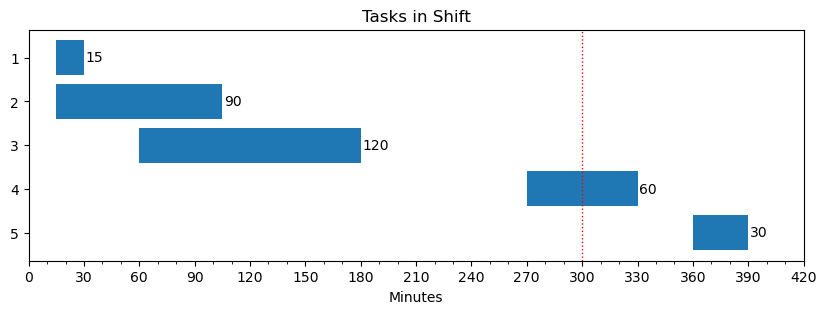

In [20]:
fig